## Prácticas Naive Bayes y KNN (ejercicio 5)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### 3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

#### 4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.

#### **5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.**

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos

In [58]:
import pandas as pd

df_data = pd.read_csv("data/data5.csv")
df_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2.0
1,-1.785269,-0.565972,1.346475,1.041822,-0.697704,2.0
2,1.589542,0.796631,-1.328454,-1.005298,1.753727,1.0
3,1.832943,-0.284234,-1.907732,-1.272604,-0.718502,0.0
4,1.012438,0.080761,-0.998305,-0.524684,-1.071300,0.0


### 2. Comprobación tipo de datos y nulos

In [59]:
df_data.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
target       float64
dtype: object

In [60]:
total_nulls = df_data.isnull().sum()
total_nulls

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [61]:
# Type 'target' to int
df_data['target'] = df_data['target'].astype(int)
df_data['target'] 

0      2
1      2
2      1
3      0
4      0
      ..
995    2
996    0
997    2
998    1
999    0
Name: target, Length: 1000, dtype: int32

### 3. Correlación entre variables

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.492777,-0.933126,-0.912964,-0.037674,-0.643008
feature_2,0.492777,1.000000,-0.149996,-0.152247,-0.028589,-0.043386
feature_3,-0.933126,-0.149996,1.000000,0.975758,0.028494,0.704496
feature_4,-0.912964,-0.152247,0.975758,1.000000,0.029646,0.682975
feature_5,-0.037674,-0.028589,0.028494,0.029646,1.000000,0.030719
target,-0.643008,-0.043386,0.704496,0.682975,0.030719,1.000000


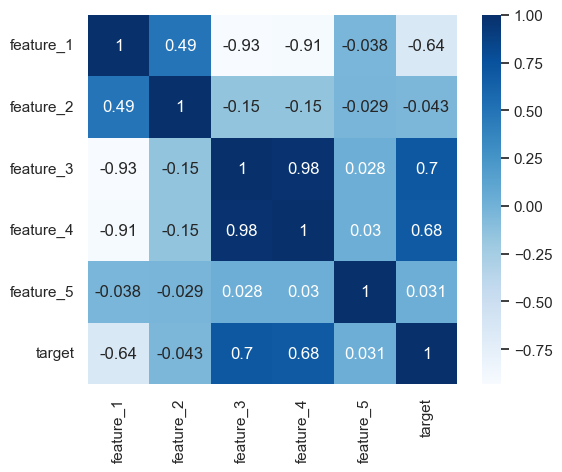

In [62]:
import seaborn as sns

sns.set()
sns.heatmap(df_data.corr(), square=True, annot=True, cmap='Blues')

df_data.corr()

# Lectura
# Correlaciones fuertes: f4 y f3, f5 y f1
# Eliminamos f4 y f5

### 4. Preparación de datos

In [63]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is the name of your target variable
X = df_data[['feature_1', 'feature_2', 'feature_3']]
y = df_data['target']

# División del conjunto de datos en train y test en un porcentaje de 2/3 vs 1/3
TEST_SIZE = 0.33
train, test = train_test_split(df_data, test_size=TEST_SIZE, random_state=42)

# Verificación de los primeros registros en el conjunto de entrenamiento (train)
train.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
703,0.088266,-0.998407,-0.491805,-0.225829,0.938113,0
311,0.590969,0.416242,-0.478345,-0.784997,-1.757139,1
722,0.527437,-1.286663,-1.017389,-0.888366,0.404692,0
629,0.888864,-1.583579,-1.472753,-1.362129,0.329130,0
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2


### 5. Clasificador Naive Bayes GB

In [64]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
import matplotlib.pyplot as plt

X_train = train[['feature_1', 'feature_2', 'feature_3']]
y_train = train['target']
X_test = test[['feature_1', 'feature_2', 'feature_3']]
y_test = test['target']

# Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['feature_1', 'feature_2', 'feature_3']))

              precision    recall  f1-score   support

   feature_1       0.84      0.83      0.84       114
   feature_2       0.79      0.88      0.83       100
   feature_3       0.86      0.78      0.81       116

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



### 6. Clasificación con KNN

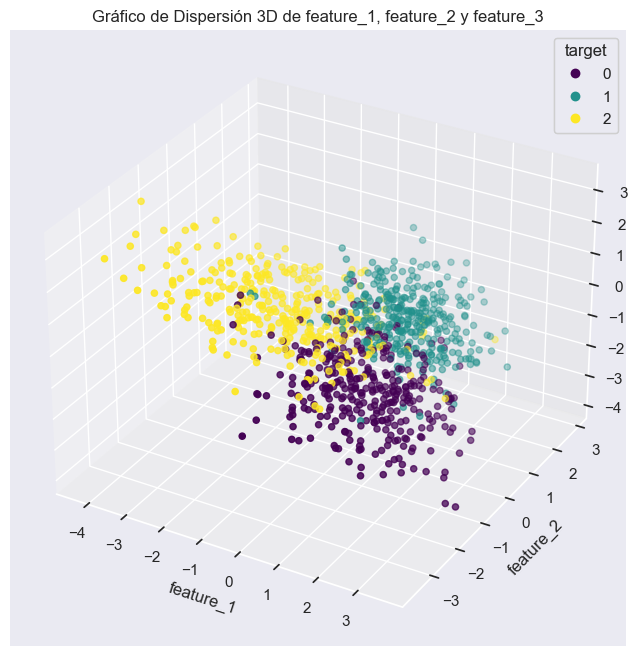

In [65]:
# Visualización de los datos para la elección del método de clasificación
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión 3D
scatter = ax.scatter(df_data['feature_1'], df_data['feature_2'], df_data['feature_3'], c=df_data['target'], cmap='viridis')

# Configuración de etiquetas y título
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('feature_3')
plt.title('Gráfico de Dispersión 3D de feature_1, feature_2 y feature_3')

# Leyenda basada en el color de las clases
legend = ax.legend(*scatter.legend_elements(), title='target')
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()



Max Value uniform : 0.8388059701492537 (11)
Max Value distance : 0.8388059701492537 (19)


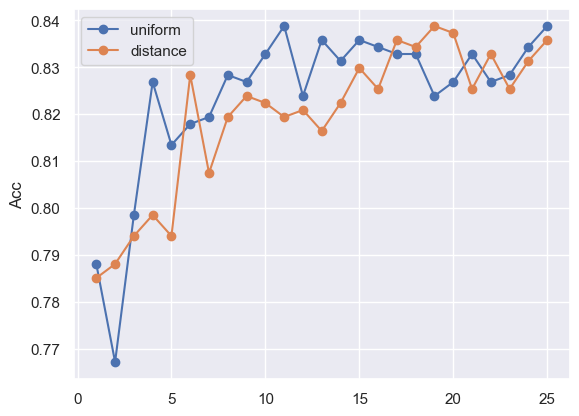

In [70]:
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

MIN_NEIGHBOR = 1
MAX_NEIGHBOR = 26

cv = KFold(n_splits=5, shuffle=True)
train = pd.concat([X_train, y_train], axis=1)

for i, weights in enumerate(['uniform', 'distance']): 

    total_scores = []
    
    for n_neighbors in range(MIN_NEIGHBOR, MAX_NEIGHBOR):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]
            
            # Entrenamiento y ejecución del modelo
            knn.fit(X=f_train.drop(['target'], axis=1), y=f_train['target'])
            y_pred = knn.predict(X=f_test.drop(['target'], axis=1))
            
            # Evaluación del modelo
            acc = accuracy_score(f_test['target'], y_pred)
            fold_accuracy.append(acc)
            
        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))
        
    plt.plot(range(1, len(total_scores) + 1), total_scores, marker='o', label=weights)
    
    print('Max Value ' + weights + " : " + str(max(total_scores)) + " (" + str(np.argmax(total_scores) + 1) + ")")
    
plt.ylabel('Acc')
plt.legend()
plt.show()

In [71]:
# Configuración de hiperparámetros
n_neighbors = 3 # Cuanto menos vecinos, más generaliza
weights = 'uniform'

# Configuración del clasificador KNN
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)

# Entrenamiento del clasificador KNN
knn.fit(X = X_train, y = y_train)

# Predicción de los datos de test
y_pred = knn.predict(X = X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo KNN con {n_neighbors} vecinos y pesos "{weights}" es: {acc:.4f}')

La precisión del modelo KNN con 3 vecinos y pesos "uniform" es: 0.8134


## 7. Matriz de Confusión

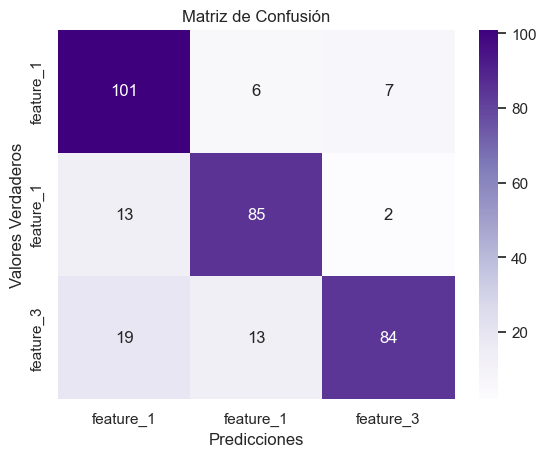

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
classes = ['feature_1', 'feature_1', 'feature_3']

sns.heatmap(cm, annot=True, cmap='Purples', xticklabels=classes, yticklabels=classes, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()